# Train and test AVIDNet

In [1]:
import torch
import os
from torchsummary import summary
from collections import defaultdict

from datasets.utils import get_data_transforms, separate_datasets, get_data_loaders, show_samples
from models.model import get_model
from models.train import train_model
from models.metrics import update_mean_metrics, print_metrics

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Load data

In [3]:
fold = 5
labeled_num_per_cls, mu = 25, 4
batch_size = 6
data_dir = 'data/CXR/train-test'
lb_partial_dir = 'train_lb/train_lb_'
dataset_types = ['train', 'test'] # ['train', 'val', 'test']

{'train_lb': 75, 'train_ulb': 300, 'train_ulb_wa': 300, 'test': 1582}


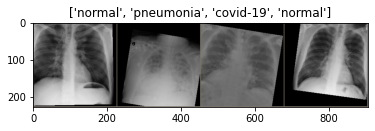

In [4]:
data_transforms = get_data_transforms(purpose='fixaug2')
data_loaders, dataset_sizes, class_names = get_data_loaders(data_transforms, fold, batch_size, dataset_types,
                                                            data_dir, lb_partial_dir, purpose='fixaug2', mu=mu)
print(dataset_sizes)
show_samples(data_loaders, class_names, dataset_type='train_lb')

## Train the model

In [5]:
trained_models = []
cls_names = ['All', 'COVID-19', 'Pneumonia', 'Normal']
metric_types = ['acc'] # metric_types = ['acc', 'ppv', 'recall', 'f1']
mean_metrics = {m_type: defaultdict(float) for m_type in metric_types}
for i in range(fold):
    model_ft, criterion, optimizer_ft, exp_lr_scheduler = get_model(device, fine_tuning=False)
    model, metrics = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, i, cls_names,
                                 metric_types, dataset_types, data_loaders, dataset_sizes, device, num_epochs=20,
                                 lambda_u=1.0, threshold=0.95, purpose='fixmatch')
    trained_models.append(model)
    mean_metrics = update_mean_metrics(cls_names, mean_metrics, metrics, status='training')

mean_metrics = update_mean_metrics(cls_names, mean_metrics, status='final', fold=fold)
print_metrics(mean_metrics, cls_names, phase='Mean results')

--------------------
Model 1
--------------------

Epoch 0/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-_zh5j5nb'


[train]
LOSS - 1.1803
ACC - All: 0.3200  COVID-19: 0.2400  Pneumonia: 0.3200  Normal: 0.4000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.9111
ACC - All: 0.5645  COVID-19: 0.0000  Pneumonia: 1.0000  Normal: 0.0135 

Validation loss decreased (inf --> 0.911114).

Epoch 1/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-4of9d4wq'


[train]
LOSS - 1.1159
ACC - All: 0.2933  COVID-19: 0.2400  Pneumonia: 0.3600  Normal: 0.2800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.9373
ACC - All: 0.6024  COVID-19: 0.6214  Pneumonia: 0.8949  Normal: 0.1633 

EarlyStopping counter: 1 out of 5

Epoch 2/19
----------
[train]
LOSS - 0.9458
ACC - All: 0.5333  COVID-19: 0.6800  Pneumonia: 0.4800  Normal: 0.4400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.8355
ACC - All: 0.5088  COVID-19: 0.0097  Pneumonia: 0.2452  Normal: 0.9882 

Validation loss decreased (0.911114 --> 0.835451).

Epoch 3/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-a6fg4gag'


[train]
LOSS - 0.8676
ACC - All: 0.6133  COVID-19: 0.6800  Pneumonia: 0.3600  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6998
ACC - All: 0.6681  COVID-19: 0.0971  Pneumonia: 0.9932  Normal: 0.2828 

Validation loss decreased (0.835451 --> 0.699781).

Epoch 4/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-ziv851j2'


[train]
LOSS - 1.0397
ACC - All: 0.4933  COVID-19: 0.2800  Pneumonia: 0.6800  Normal: 0.5200 
Mask ratio's range: 0.7916666567325592 ~ 1.0

[test]
LOSS - 1.0277
ACC - All: 0.5044  COVID-19: 0.6990  Pneumonia: 0.2079  Normal: 0.9125 

EarlyStopping counter: 1 out of 5

Epoch 5/19
----------
[train]
LOSS - 0.8437
ACC - All: 0.7200  COVID-19: 0.7600  Pneumonia: 0.7200  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5936
ACC - All: 0.7611  COVID-19: 0.1262  Pneumonia: 0.7333  Normal: 0.9125 

Validation loss decreased (0.699781 --> 0.593599).

Epoch 6/19
----------
[train]
LOSS - 0.6466
ACC - All: 0.7467  COVID-19: 0.6800  Pneumonia: 0.6800  Normal: 0.8800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.6482
ACC - All: 0.7914  COVID-19: 0.6505  Pneumonia: 0.8960  Normal: 0.6599 

EarlyStopping counter: 1 out of 5

Epoch 7/19
----------
[train]
LOSS - 0.9049
ACC - All: 0.5733  COVID-19: 0.9200  Pneumonia: 0.6000  Normal: 0.2000 
Mask ratio's ran

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-v6imdbd3'


[train]
LOSS - 0.6539
ACC - All: 0.7600  COVID-19: 0.7200  Pneumonia: 0.8400  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5219
ACC - All: 0.8040  COVID-19: 0.1845  Pneumonia: 0.8780  Normal: 0.8013 

Validation loss decreased (0.593599 --> 0.521886).

Epoch 9/19
----------
[train]
LOSS - 0.7155
ACC - All: 0.7333  COVID-19: 0.6800  Pneumonia: 0.6800  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.6266
ACC - All: 0.7491  COVID-19: 0.2524  Pneumonia: 0.6780  Normal: 0.9411 

EarlyStopping counter: 1 out of 5

Epoch 10/19
----------
[train]
LOSS - 0.6333
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5593
ACC - All: 0.8116  COVID-19: 0.3204  Pneumonia: 0.8520  Normal: 0.8367 

EarlyStopping counter: 2 out of 5

Epoch 11/19
----------
[train]
LOSS - 0.6056
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's r

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-wohix00h'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 1.0992
ACC - All: 0.3333  COVID-19: 0.2000  Pneumonia: 0.5200  Normal: 0.2800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.1603
ACC - All: 0.2332  COVID-19: 1.0000  Pneumonia: 0.0542  Normal: 0.3670 

Validation loss decreased (1.333848 --> 1.160297).

Epoch 2/19
----------
[train]
LOSS - 1.0449
ACC - All: 0.4533  COVID-19: 0.4800  Pneumonia: 0.3200  Normal: 0.5600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7116
ACC - All: 0.6877  COVID-19: 0.0097  Pneumonia: 0.6147  Normal: 0.9141 

Validation loss decreased (1.160297 --> 0.711560).

Epoch 3/19
----------
[train]
LOSS - 0.9094
ACC - All: 0.6400  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.4000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6665
ACC - All: 0.7231  COVID-19: 0.0000  Pneumonia: 0.6904  Normal: 0.8973 

Validation loss decreased (0.711560 --> 0.666492).

Epoch 4/19
----------
[train]
LOSS - 0.8252
ACC - All: 0.6000  COVID-19: 0.6000  Pneumonia: 0.4800  Normal: 0.7200 
Mask ratio's range: 0.95833

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-fxjiq7z3'


[train]
LOSS - 0.7128
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5337
ACC - All: 0.7990  COVID-19: 0.0777  Pneumonia: 0.9085  Normal: 0.7609 

Validation loss decreased (0.587182 --> 0.533699).

Epoch 6/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-tckfhtm7'


[train]
LOSS - 0.6385
ACC - All: 0.7333  COVID-19: 0.9200  Pneumonia: 0.4800  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5591
ACC - All: 0.7851  COVID-19: 0.1262  Pneumonia: 0.9503  Normal: 0.6532 

EarlyStopping counter: 1 out of 5

Epoch 7/19
----------
[train]
LOSS - 0.8385
ACC - All: 0.7600  COVID-19: 0.7200  Pneumonia: 1.0000  Normal: 0.5600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5538
ACC - All: 0.7901  COVID-19: 0.1456  Pneumonia: 0.9514  Normal: 0.6616 

EarlyStopping counter: 2 out of 5

Epoch 8/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-wjg8crel'


[train]
LOSS - 0.6807
ACC - All: 0.7200  COVID-19: 0.7200  Pneumonia: 0.8000  Normal: 0.6400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5233
ACC - All: 0.8047  COVID-19: 0.1942  Pneumonia: 0.8893  Normal: 0.7845 

Validation loss decreased (0.533699 --> 0.523299).

Epoch 9/19
----------
[train]
LOSS - 0.6349
ACC - All: 0.7467  COVID-19: 0.8800  Pneumonia: 0.6400  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5722
ACC - All: 0.7832  COVID-19: 0.2136  Pneumonia: 0.7977  Normal: 0.8603 

EarlyStopping counter: 1 out of 5

Epoch 10/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-eplpstzo'


[train]
LOSS - 0.5975
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5312
ACC - All: 0.7939  COVID-19: 0.1456  Pneumonia: 0.8565  Normal: 0.8131 

EarlyStopping counter: 2 out of 5

Epoch 11/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-r8y5ocv5'


[train]
LOSS - 0.6412
ACC - All: 0.7867  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.6800 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5226
ACC - All: 0.8059  COVID-19: 0.1748  Pneumonia: 0.8836  Normal: 0.7997 

Validation loss decreased (0.523299 --> 0.522590).

Epoch 12/19
----------
[train]
LOSS - 0.6397
ACC - All: 0.7467  COVID-19: 0.7200  Pneumonia: 0.8000  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5226
ACC - All: 0.8078  COVID-19: 0.2233  Pneumonia: 0.8960  Normal: 0.7778 

EarlyStopping counter: 1 out of 5

Epoch 13/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-_35sry1d'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6227
ACC - All: 0.8400  COVID-19: 0.9600  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5117
ACC - All: 0.8085  COVID-19: 0.2233  Pneumonia: 0.9006  Normal: 0.7727 

Validation loss decreased (0.522590 --> 0.511731).

Epoch 14/19
----------
[train]
LOSS - 0.6443
ACC - All: 0.7600  COVID-19: 0.7600  Pneumonia: 0.8000  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5193
ACC - All: 0.8053  COVID-19: 0.2233  Pneumonia: 0.8870  Normal: 0.7845 

EarlyStopping counter: 1 out of 5

Epoch 15/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-dm4_vzit'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5962
ACC - All: 0.7867  COVID-19: 0.8800  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5186
ACC - All: 0.8040  COVID-19: 0.2233  Pneumonia: 0.8915  Normal: 0.7744 

EarlyStopping counter: 2 out of 5

Epoch 16/19
----------
[train]
LOSS - 0.7314
ACC - All: 0.7200  COVID-19: 0.7600  Pneumonia: 0.7600  Normal: 0.6400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5268
ACC - All: 0.8003  COVID-19: 0.1650  Pneumonia: 0.8915  Normal: 0.7744 

EarlyStopping counter: 3 out of 5

Epoch 17/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-1cs_eaw0'


[train]
LOSS - 0.7718
ACC - All: 0.7733  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5235
ACC - All: 0.8009  COVID-19: 0.2039  Pneumonia: 0.8712  Normal: 0.7997 

EarlyStopping counter: 4 out of 5

Epoch 18/19
----------
[train]
LOSS - 0.6120
ACC - All: 0.8133  COVID-19: 0.7600  Pneumonia: 0.9200  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5238
ACC - All: 0.7958  COVID-19: 0.1748  Pneumonia: 0.8689  Normal: 0.7946 

EarlyStopping counter: 5 out of 5

Early stopping!!

--------------------
[Best results]
ACC - All: 0.7958  COVID-19: 0.1748  Pneumonia: 0.8689  Normal: 0.7946 

Training complete in 16m 39s
-------------------- 

--------------------
Model 3
--------------------

Epoch 0/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-a7cu45g3'


[train]
LOSS - 1.1488
ACC - All: 0.3333  COVID-19: 0.6000  Pneumonia: 0.3600  Normal: 0.0400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.8194
ACC - All: 0.6150  COVID-19: 0.0000  Pneumonia: 0.8904  Normal: 0.3114 

Validation loss decreased (inf --> 0.819365).

Epoch 1/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-q7xf9x7m'


[train]
LOSS - 1.1971
ACC - All: 0.4667  COVID-19: 0.4000  Pneumonia: 0.4400  Normal: 0.5600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.0838
ACC - All: 0.3635  COVID-19: 0.9223  Pneumonia: 0.5412  Normal: 0.0017 

EarlyStopping counter: 1 out of 5

Epoch 2/19
----------
[train]
LOSS - 0.9687
ACC - All: 0.4933  COVID-19: 0.4000  Pneumonia: 0.6800  Normal: 0.4000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.8293
ACC - All: 0.6650  COVID-19: 0.3883  Pneumonia: 0.5017  Normal: 0.9562 

EarlyStopping counter: 2 out of 5

Epoch 3/19
----------
[train]
LOSS - 0.9105
ACC - All: 0.5467  COVID-19: 0.4800  Pneumonia: 0.7200  Normal: 0.4400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6893
ACC - All: 0.7971  COVID-19: 0.5049  Pneumonia: 0.8927  Normal: 0.7054 

Validation loss decreased (0.819365 --> 0.689273).

Epoch 4/19
----------
[train]
LOSS - 0.7387
ACC - All: 0.6533  COVID-19: 0.9200  Pneumonia: 0.6400  Normal: 0.4000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7016
ACC - All

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-9_uii0ef'


[train]
LOSS - 1.2479
ACC - All: 0.4800  COVID-19: 0.3600  Pneumonia: 0.6800  Normal: 0.4000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.8427
ACC - All: 0.6625  COVID-19: 0.7476  Pneumonia: 0.5514  Normal: 0.8131 

EarlyStopping counter: 2 out of 5

Epoch 6/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-3atceuut'


[train]
LOSS - 0.9632
ACC - All: 0.5600  COVID-19: 0.6000  Pneumonia: 0.4000  Normal: 0.6800 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.6068
ACC - All: 0.7219  COVID-19: 0.2718  Pneumonia: 0.9774  Normal: 0.4192 

Validation loss decreased (0.689273 --> 0.606791).

Epoch 7/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-63x37xsx'


[train]
LOSS - 0.8577
ACC - All: 0.6800  COVID-19: 0.7200  Pneumonia: 1.0000  Normal: 0.3200 
Mask ratio's range: 0.875 ~ 1.0

[test]
LOSS - 0.5306
ACC - All: 0.8173  COVID-19: 0.3495  Pneumonia: 0.9028  Normal: 0.7710 

Validation loss decreased (0.606791 --> 0.530567).

Epoch 8/19
----------
[train]
LOSS - 0.6922
ACC - All: 0.7600  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.6000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5543
ACC - All: 0.8142  COVID-19: 0.3495  Pneumonia: 0.8316  Normal: 0.8687 

EarlyStopping counter: 1 out of 5

Epoch 9/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-8i5mf_0o'


[train]
LOSS - 0.7025
ACC - All: 0.7867  COVID-19: 0.9200  Pneumonia: 0.8000  Normal: 0.6400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5321
ACC - All: 0.8148  COVID-19: 0.3398  Pneumonia: 0.8452  Normal: 0.8519 

EarlyStopping counter: 2 out of 5

Epoch 10/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-fhbmkj14'


[train]
LOSS - 0.6241
ACC - All: 0.7733  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.7200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5979
ACC - All: 0.7611  COVID-19: 0.2816  Pneumonia: 0.7028  Normal: 0.9310 

EarlyStopping counter: 3 out of 5

Epoch 11/19
----------
[train]
LOSS - 0.7191
ACC - All: 0.7067  COVID-19: 0.7600  Pneumonia: 0.5600  Normal: 0.8000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.5465
ACC - All: 0.8053  COVID-19: 0.3301  Pneumonia: 0.8079  Normal: 0.8838 

EarlyStopping counter: 4 out of 5

Epoch 12/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-sbvxsi1h'


[train]
LOSS - 0.6311
ACC - All: 0.8000  COVID-19: 0.8400  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5309
ACC - All: 0.8078  COVID-19: 0.2621  Pneumonia: 0.8350  Normal: 0.8620 

EarlyStopping counter: 5 out of 5

Early stopping!!

--------------------
[Best results]
ACC - All: 0.8078  COVID-19: 0.2621  Pneumonia: 0.8350  Normal: 0.8620 

Training complete in 10m 3s
-------------------- 

--------------------
Model 4
--------------------

Epoch 0/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-4gkjwilu'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 1.1014
ACC - All: 0.3600  COVID-19: 0.1600  Pneumonia: 0.6800  Normal: 0.2400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.4438
ACC - All: 0.0695  COVID-19: 0.9903  Pneumonia: 0.0000  Normal: 0.0135 

Validation loss decreased (inf --> 1.443794).

Epoch 1/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-0skl9erl'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 1.0630
ACC - All: 0.5200  COVID-19: 0.6000  Pneumonia: 0.6000  Normal: 0.3600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7488
ACC - All: 0.7478  COVID-19: 0.0194  Pneumonia: 0.9288  Normal: 0.6044 

Validation loss decreased (1.443794 --> 0.748808).

Epoch 2/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-zut25gxh'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.9216
ACC - All: 0.5733  COVID-19: 0.4800  Pneumonia: 0.6000  Normal: 0.6400 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.7782
ACC - All: 0.6802  COVID-19: 0.1359  Pneumonia: 0.5672  Normal: 0.9428 

EarlyStopping counter: 1 out of 5

Epoch 3/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-8120wo35'


[train]
LOSS - 0.9062
ACC - All: 0.5867  COVID-19: 0.7200  Pneumonia: 0.4800  Normal: 0.5600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.8058
ACC - All: 0.5575  COVID-19: 0.0194  Pneumonia: 0.3299  Normal: 0.9899 

EarlyStopping counter: 2 out of 5

Epoch 4/19
----------
[train]
LOSS - 0.7612
ACC - All: 0.6667  COVID-19: 0.7200  Pneumonia: 0.5600  Normal: 0.7200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.6185
ACC - All: 0.7389  COVID-19: 0.0000  Pneumonia: 0.7164  Normal: 0.9007 

Validation loss decreased (0.748808 --> 0.618492).

Epoch 5/19
----------
[train]
LOSS - 0.8653
ACC - All: 0.6267  COVID-19: 0.7200  Pneumonia: 0.4800  Normal: 0.6800 
Mask ratio's range: 0.8333333283662796 ~ 1.0

[test]
LOSS - 0.7600
ACC - All: 0.6290  COVID-19: 0.0777  Pneumonia: 0.9932  Normal: 0.1818 

EarlyStopping counter: 1 out of 5

Epoch 6/19
----------
[train]
LOSS - 0.7875
ACC - All: 0.6800  COVID-19: 0.6800  Pneumonia: 0.7200  Normal: 0.6400 
Mask ratio's range: 0.8333333283662796 ~ 1.0



Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-83n5odms'


[train]
LOSS - 0.6826
ACC - All: 0.8133  COVID-19: 0.8000  Pneumonia: 0.7200  Normal: 0.9200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5493
ACC - All: 0.7870  COVID-19: 0.1359  Pneumonia: 0.8147  Normal: 0.8586 

Validation loss decreased (0.618492 --> 0.549314).

Epoch 8/19
----------
[train]
LOSS - 0.6722
ACC - All: 0.7467  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.6400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5716
ACC - All: 0.7769  COVID-19: 0.1748  Pneumonia: 0.7774  Normal: 0.8805 

EarlyStopping counter: 1 out of 5

Epoch 9/19
----------
[train]
LOSS - 0.5926
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.8400  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5762
ACC - All: 0.7686  COVID-19: 0.1359  Pneumonia: 0.7605  Normal: 0.8906 

EarlyStopping counter: 2 out of 5

Epoch 10/19
----------
[train]
LOSS - 0.5571
ACC - All: 0.7867  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's ra

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-f6ohrj4y'


[train]
LOSS - 0.6811
ACC - All: 0.7733  COVID-19: 0.7200  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5690
ACC - All: 0.7705  COVID-19: 0.1262  Pneumonia: 0.7751  Normal: 0.8754 

EarlyStopping counter: 4 out of 5

Epoch 12/19
----------
[train]
LOSS - 0.7312
ACC - All: 0.8400  COVID-19: 0.8000  Pneumonia: 0.8800  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5445
ACC - All: 0.7882  COVID-19: 0.0971  Pneumonia: 0.8294  Normal: 0.8468 

Validation loss decreased (0.549314 --> 0.544537).

Epoch 13/19
----------
[train]
LOSS - 0.7202
ACC - All: 0.7200  COVID-19: 0.6800  Pneumonia: 0.7600  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5795
ACC - All: 0.7617  COVID-19: 0.1262  Pneumonia: 0.7503  Normal: 0.8889 

EarlyStopping counter: 1 out of 5

Epoch 14/19
----------
[train]
LOSS - 0.5952
ACC - All: 0.8267  COVID-19: 0.8000  Pneumonia: 0.8400  Normal: 0.8400 
Mask ratio's 

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-0tejkbtx'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.6937
ACC - All: 0.7600  COVID-19: 0.8000  Pneumonia: 0.7200  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5766
ACC - All: 0.7642  COVID-19: 0.1165  Pneumonia: 0.7525  Normal: 0.8939 

EarlyStopping counter: 3 out of 5

Epoch 16/19
----------
[train]
LOSS - 0.5882
ACC - All: 0.8267  COVID-19: 0.8400  Pneumonia: 0.8000  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5733
ACC - All: 0.7636  COVID-19: 0.1165  Pneumonia: 0.7571  Normal: 0.8855 

EarlyStopping counter: 4 out of 5

Epoch 17/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-s1iem_dy'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.5588
ACC - All: 0.8133  COVID-19: 0.8400  Pneumonia: 0.7600  Normal: 0.8400 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5463
ACC - All: 0.7920  COVID-19: 0.1845  Pneumonia: 0.8203  Normal: 0.8552 

EarlyStopping counter: 5 out of 5

Early stopping!!

--------------------
[Best results]
ACC - All: 0.7920  COVID-19: 0.1845  Pneumonia: 0.8203  Normal: 0.8552 

Training complete in 13m 41s
-------------------- 

--------------------
Model 5
--------------------

Epoch 0/19
----------
[train]
LOSS - 1.1417
ACC - All: 0.3067  COVID-19: 0.3200  Pneumonia: 0.4800  Normal: 0.1200 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 0.9136
ACC - All: 0.6011  COVID-19: 0.0194  Pneumonia: 0.9831  Normal: 0.1330 

Validation loss decreased (inf --> 0.913608).

Epoch 1/19
----------
[train]
LOSS - 1.0322
ACC - All: 0.4933  COVID-19: 0.2400  Pneumonia: 0.6800  Normal: 0.5600 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.3023
ACC - All: 0.1290  COVID-19: 0.9903  Pneumoni

Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-tmmzc5su'


[train]
LOSS - 0.7971
ACC - All: 0.7600  COVID-19: 0.8000  Pneumonia: 0.8000  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5434
ACC - All: 0.7920  COVID-19: 0.2524  Pneumonia: 0.8147  Normal: 0.8519 

EarlyStopping counter: 2 out of 5

Epoch 10/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-q4_ymi4d'


[train]
LOSS - 0.7515
ACC - All: 0.7333  COVID-19: 0.6000  Pneumonia: 0.8000  Normal: 0.8000 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5176
ACC - All: 0.8053  COVID-19: 0.2718  Pneumonia: 0.8542  Normal: 0.8249 

Validation loss decreased (0.518854 --> 0.517592).

Epoch 11/19
----------
[train]
LOSS - 0.6521
ACC - All: 0.7600  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.6800 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5404
ACC - All: 0.7927  COVID-19: 0.3010  Pneumonia: 0.8045  Normal: 0.8603 

EarlyStopping counter: 1 out of 5

Epoch 12/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-fimn6da2'


[train]
LOSS - 0.6098
ACC - All: 0.7467  COVID-19: 0.8000  Pneumonia: 0.6800  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5417
ACC - All: 0.7977  COVID-19: 0.3204  Pneumonia: 0.8169  Normal: 0.8519 

EarlyStopping counter: 2 out of 5

Epoch 13/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-w00q9bvh'
Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/tor

[train]
LOSS - 0.7463
ACC - All: 0.6933  COVID-19: 0.5200  Pneumonia: 0.8000  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5220
ACC - All: 0.7889  COVID-19: 0.2039  Pneumonia: 0.8158  Normal: 0.8502 

EarlyStopping counter: 3 out of 5

Epoch 14/19
----------
[train]
LOSS - 0.5599
ACC - All: 0.8533  COVID-19: 0.7600  Pneumonia: 0.8800  Normal: 0.9200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5171
ACC - All: 0.7977  COVID-19: 0.1942  Pneumonia: 0.8441  Normal: 0.8333 

Validation loss decreased (0.517592 --> 0.517138).

Epoch 15/19
----------
[train]
LOSS - 0.8505
ACC - All: 0.7333  COVID-19: 0.6400  Pneumonia: 0.7600  Normal: 0.8000 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5413
ACC - All: 0.7901  COVID-19: 0.2233  Pneumonia: 0.8034  Normal: 0.8687 

EarlyStopping counter: 1 out of 5

Epoch 16/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-71xcog1a'


[train]
LOSS - 0.7238
ACC - All: 0.8533  COVID-19: 0.7600  Pneumonia: 0.8400  Normal: 0.9600 
Mask ratio's range: 0.9166666641831398 ~ 1.0

[test]
LOSS - 0.5244
ACC - All: 0.7882  COVID-19: 0.1942  Pneumonia: 0.8192  Normal: 0.8451 

EarlyStopping counter: 2 out of 5

Epoch 17/19
----------


Traceback (most recent call last):
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 277, in _run_finalizers
    finalizer()
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 201, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/multiprocessing/util.py", line 110, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 498, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/aiffel0042/anaconda3/envs/torch1.6/lib/python3.7/shutil.py", line 496, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-g4z9hz95'


[train]
LOSS - 0.7922
ACC - All: 0.7067  COVID-19: 0.6400  Pneumonia: 0.7200  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5326
ACC - All: 0.7946  COVID-19: 0.2718  Pneumonia: 0.8023  Normal: 0.8737 

EarlyStopping counter: 3 out of 5

Epoch 18/19
----------
[train]
LOSS - 0.6794
ACC - All: 0.7733  COVID-19: 0.6800  Pneumonia: 0.9200  Normal: 0.7200 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5200
ACC - All: 0.7933  COVID-19: 0.2621  Pneumonia: 0.8192  Normal: 0.8468 

EarlyStopping counter: 4 out of 5

Epoch 19/19
----------
[train]
LOSS - 0.7221
ACC - All: 0.7467  COVID-19: 0.7600  Pneumonia: 0.7200  Normal: 0.7600 
Mask ratio's range: 0.9583333320915699 ~ 1.0

[test]
LOSS - 0.5179
ACC - All: 0.7939  COVID-19: 0.2524  Pneumonia: 0.8249  Normal: 0.8418 

EarlyStopping counter: 5 out of 5

Early stopping!!

--------------------
[Best results]
ACC - All: 0.7939  COVID-19: 0.2524  Pneumonia: 0.8249  Normal: 0.8418 

Training complete in

### Save and load model

In [6]:
out_dir = 'trained_models/baseline'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
    
for i, model in enumerate(trained_models):
    torch.save(model, f'trained_models/baseline/baseline_model_with_fixmatch_aug2_{i}.pt')

In [7]:
trained_model = []
for i in range(fold):
    trained_models.append(torch.load(f'trained_models/baseline/baseline_model_with_fixmatch_aug2_{i}.pt'))
    
summary(trained_models[0], (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,